In [1]:
!pip install pandas

In [2]:
!pip install mediapipe opencv-python

In [3]:
from pydub import AudioSegment
from pydub.playback import play

In [4]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [5]:
# VIDEO FEED

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('MediaPipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [5]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)



# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils

In [7]:
import os
from PIL import Image

# Folder path containing images
folder_path = "E:/capstone/Dataset/testing"

# # List to store image data
# images = []

# # Iterate over files in the folder
# for filename in os.listdir(folder_path):
#     # Check if the file is an image (you might want to add more image extensions)
#     if filename.endswith(".jpg") or filename.endswith(".png"):
#         # Construct the full file path
#         file_path = os.path.join(folder_path, filename)
#         # Open the image using Pillow
#         img = Image.open(file_path)
#         # Append the image to the list
#         images.append(img)
#         # You can perform any processing or testing here with the image

# # Now you have all the images loaded in the 'images' list
# # You can loop through this list to perform testing or processing




# List to store image paths
image_paths = []

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image (you might want to add more image extensions)
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        # Append the file path to the list
        file_path.replace("\\",'/')
        image_paths.append(file_path)


In [8]:
image_paths

['E:/capstone/Dataset/testing\\ams_1.png',
 'E:/capstone/Dataset/testing\\ams_10.png',
 'E:/capstone/Dataset/testing\\ams_101.jpeg',
 'E:/capstone/Dataset/testing\\ams_11.png',
 'E:/capstone/Dataset/testing\\ams_12.png',
 'E:/capstone/Dataset/testing\\ams_13.png',
 'E:/capstone/Dataset/testing\\ams_14.png',
 'E:/capstone/Dataset/testing\\ams_15.png',
 'E:/capstone/Dataset/testing\\ams_16.png',
 'E:/capstone/Dataset/testing\\ams_17.png',
 'E:/capstone/Dataset/testing\\ams_18.png',
 'E:/capstone/Dataset/testing\\ams_19.png',
 'E:/capstone/Dataset/testing\\ams_2.png',
 'E:/capstone/Dataset/testing\\ams_20.png',
 'E:/capstone/Dataset/testing\\ams_201.jpeg',
 'E:/capstone/Dataset/testing\\ams_3.png',
 'E:/capstone/Dataset/testing\\ams_301.jpeg',
 'E:/capstone/Dataset/testing\\ams_4.png',
 'E:/capstone/Dataset/testing\\ams_401.jpeg',
 'E:/capstone/Dataset/testing\\ams_5.png',
 'E:/capstone/Dataset/testing\\ams_501.jpeg',
 'E:/capstone/Dataset/testing\\ams_6.png',
 'E:/capstone/Dataset/testin

In [9]:
len(image_paths)

215

In [10]:
# CALCULATE ANGLES

def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle
    

# testing

In [11]:
import csv


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle


# left_arm_data = []
# right_arm_data = []
# left_leg_data = []
# right_leg_data = []

# lower_body=[]
# middle_body=[]
# upper_body=[]
extraams=0
extraau=0
extrabal=0
extrabhu=0
extracat=0
extracam=0
extrasbv=0
extraut=0
ams_list=[]
au_list=[]
bal_list=[]
bhu_list=[]
cat_list=[]
cam_list=[]
sbv_list=[]
ut_list=[]
extra=0
ams=0
bal=0
bhu=0
sbv=0
ut=0
cat=0
cam=0
ytrue=[]
ypred=[]
au=0
correct=0
total=0
amslb=[]
amsmb=[]
amsub=[]
arm=[]
shldr=[]
hip=[]
leg=[]


total=len(image_paths)

for image_path in image_paths:
    
    
    
    
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
#             print(s)
            break
        else:
            s+=ip
        
        
    
#     image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
    output = cv2.imread(image_path)

    image_pose = output 
    pose = pose_image
    draw = True
    display = True
    # def detectPose(image_pose, pose, draw=False, display=False):
    

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:    


        landmarks = resultant.pose_landmarks.landmark



    ####################################################################
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]


        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
        left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]



















    #########################################################
        # CALCULATE THE ANGLE
    #     angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
    #     angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
    #     angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
    #     angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  

    
#     Adho mukha savasana

        lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
        lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

        middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

        upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
        upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)
        
        upper_body_1_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        upper_body_2_1 = calculate_angles(right_shoulder,right_elbow,right_wrist)
        
        leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
        leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

        hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
        hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)
        
        hip_1_1 = calculate_angles(left_knee,left_hip,nose)
        hip_2_2 = calculate_angles(right_knee,right_hip,nose)
        
        
        shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
        shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

        arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)



        lb = (lower_body_1 + lower_body_2)/2
        mb = (middle_body_1 + middle_body_2)/2
        ub = (upper_body_1 + upper_body_2)/2     
        ub2 = (upper_body_1_1 + upper_body_2_1)/2


        arms = (arms_1 + arms_2)/2
        shoulder = (shoulder_1 + shoulder_2)/2
        hips = (hip_1 + hip_2)/2
        legs = (leg_1 + leg_2)/2
        
        hips_tri = hip_triangle

        hips_cc = (hip_1_1 + hip_2_2)/2
    
        
        
        
#         ams

        if((lb>=160 and lb<=180) and (mb>=50 and mb<=85) and (ub>=155 and ub<=180)):
            if(s=="ams"):
                
                correct+=1
                ams+=1
#                 y_true.append(1)
                lb=round(lb,2)
                mb=round(mb,2)
                ub=round(ub,2)
                amslb.append(lb)
                amsmb.append(mb)
                amsub.append(ub)
            else:
                extraams+=1
                print(img_path)

    

            
#             uttanasana
        if((arms>=140 and arms<=180) and (shoulder>=75 and shoulder<=115) and (hips>=40 and hips<=70) and (legs>=150 and legs<=180)):
            if(s=="au"):
                correct+=1
                au+=1
                arms=round(arms,2)
                shoulder=round(shoulder,2)
                hips=round(hips,2)
                legs=round(legs,2)
                
                arm.append(arms)
                shldr.append(shoulder)
                hip.append(hips)
                leg.append(legs)
            else:
                extraau+=1
                print(img_path)

           

            
#             balasana
        
        if((lb>=45 and lb<=70) and (mb>=20 and mb<=50) and (ub2>=135 and ub2<=175)):
            if(s=="bal"):
                correct+=1
                bal+=1
            else:
                extrabal+=1
                print(img_path)
 

            
#             bhujangasana

        if((lb>=140 and lb<=175) and (mb>=105 and mb<=145) and (ub2>=140 and ub2<=175)):
            if(s=="bhu"):
                correct+=1
                bhu+=1
            else:
                extrabhu+=1
                print(img_path)
            
            
#             setu bandha

        if((arms>=140 and arms<=180) and (shoulder>=50 and shoulder<=80) and (hips>=135 and hips<=170) and (legs>=50 and legs<=90)):
            if(s=="sbv"):
                correct+=1
                sbv+=1
            else:
                extrasbv+=1
                print(img_path)
                
    


#               trikona


        if((arms>=150 and arms<=180) and (shoulder>=80 and shoulder<=110) and (hips_tri>=75 and hips_tri<=105) and (legs>=155 and legs<=180)):
            if(s=="ut"):
                correct+=1
                ut+=1
            else:
                extraut+=1
                print(img_path)

            
#             cat & camel


        if((arms>=165 and arms<=180) and (hips_cc<=90) and (legs>=70 and legs<=110)):
            if(s=="cam"):
                correct+=1
                cam+=1
            else:
                extracam+=1
                print(img_path)
            
        if((arms>=165 and arms<=180) and (hips_cc>=100) and (legs>=70 and legs<=110)):
            if(s=="cat"):
                correct+=1
                cat+=1
            else:
                extracat+=1
                print(img_path)
#                 
accuracy = (correct/total)*100
print("TOTAL: ",total)
print("ACCURACY: ",accuracy)
print("CORRECT: ",correct)
print("AMS: ",ams)
print("AU: ",au)
print("BAL: ",bal)
print("BHU: ",bhu)
print("CAM: ",cam)
print("CAT: ",cat)
print("SBV: ",sbv)
print("UT: ",ut)
print("EXTRAAMS: ",extraams)
print("EXTRAAU: ",extraau)
print("EXTRABAL: ",extrabal)
print("EXTRABHU: ",extrabhu)
print("EXTRACAT: ",extracat)
print("EXTRACAM: ",extracam)
print("EXTRASBV: ",extrasbv)
print("EXTRAUT: ",extraut)

    

ams_13.png
bhu_203.jpeg
cat_5.png
sbv_ (22).png
sbv_ (9)9.png
sbv_20.png
sbv_406.jpg
ut_19.png
ut_6.png
TOTAL:  215
ACCURACY:  85.5813953488372
CORRECT:  184
AMS:  22
AU:  24
BAL:  19
BHU:  21
CAM:  25
CAT:  27
SBV:  21
UT:  25
EXTRAAMS:  0
EXTRAAU:  0
EXTRABAL:  0
EXTRABHU:  3
EXTRACAT:  5
EXTRACAM:  0
EXTRASBV:  1
EXTRAUT:  0


# adho mukha savasana

In [12]:
import csv


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle


# left_arm_data = []
# right_arm_data = []
# left_leg_data = []
# right_leg_data = []

# lower_body=[]
# middle_body=[]
# upper_body=[]
tp=0
tn=0
fp=0
fn=0
amscnt = 0
extraams=0
extraau=0
extrabal=0
extrabhu=0
extracat=0
extracam=0
extrasbv=0
extraut=0
ams_list=[]
au_list=[]
bal_list=[]
bhu_list=[]
cat_list=[]
cam_list=[]
sbv_list=[]
ut_list=[]
vis=[]
extra=0
ams=0
bal=0
bhu=0
sbv=0
ut=0
cat=0
cam=0
ytrue=[]
ypred=[]
au=0
correct=0
total=0
amslb=[]
amsmb=[]
amsub=[]
arm=[]
shldr=[]
hip=[]
leg=[]


total=len(image_paths)

for image_path in image_paths:
#     vis.append(image_path)
    
    
    
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
#             print(s)
            break
        else:
            s+=ip
        
    if(s=="ams"):
        amscnt+=1
        
    
#     image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
    output = cv2.imread(image_path)

    image_pose = output 
    pose = pose_image
    draw = True
    display = True
    # def detectPose(image_pose, pose, draw=False, display=False):
    

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:    


        landmarks = resultant.pose_landmarks.landmark



    ####################################################################
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]


        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
        left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]



















    #########################################################
        # CALCULATE THE ANGLE
    #     angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
    #     angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
    #     angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
    #     angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  

    
#     Adho mukha savasana

        lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
        lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

        middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

        upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
        upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)
        
        upper_body_1_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        upper_body_2_1 = calculate_angles(right_shoulder,right_elbow,right_wrist)
        
        leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
        leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

        hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
        hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)
        
        hip_1_1 = calculate_angles(left_knee,left_hip,nose)
        hip_2_2 = calculate_angles(right_knee,right_hip,nose)
        
        
        shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
        shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

        arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)



        lb = (lower_body_1 + lower_body_2)/2
        mb = (middle_body_1 + middle_body_2)/2
        ub = (upper_body_1 + upper_body_2)/2     
        ub2 = (upper_body_1_1 + upper_body_2_1)/2


        arms = (arms_1 + arms_2)/2
        shoulder = (shoulder_1 + shoulder_2)/2
        hips = (hip_1 + hip_2)/2
        legs = (leg_1 + leg_2)/2
        
        hips_tri = hip_triangle

        hips_cc = (hip_1_1 + hip_2_2)/2
    
        
        
        
#         ams

        if((lb>=160 and lb<=180) and (mb>=50 and mb<=85) and (ub>=155 and ub<=180)):
            if(s=="ams"):
                
                correct+=1
                ams+=1
                tp+=1
                ytrue.append(1)
                ypred.append(1)
                vis.append(image_path)
                
            else:
                extraams+=1
                fp+=1
                ytrue.append(0)
                ypred.append(1)
                print(img_path)
                vis.append(image_path)
                
        else:
            if(s!="ams"):
                tn+=1
                ytrue.append(0)
                ypred.append(0)
                vis.append(image_path)
            else:
                fn+=1
                ytrue.append(1)
                ypred.append(0)
                vis.append(image_path)

    

            
#             uttanasana
        
# accuracy = (correct/total)*100
print("TOTAL: ",total)
# print("ACCURACY: ",accuracy)
# print("CORRECT: ",correct)
# print("AMS: ",ams)

# print("EXTRAAMS: ",extraams)
# print("AMS COUNT: ",amscnt)

print("TRUE POSITIVE: ",tp)
print("TRUE NEGATIVE: ",tn)
print("FALSE POSITIVE: ",fp)
print("FALSE NEGATIVE: ",fn)

accuracy = (tn+tp)/(tn+fp+tp+fn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1score = 2 * ((precision*recall)/(precision+recall))

accuracy = round(accuracy,6)
precision = round(precision,6)
recall = round(recall,6)
f1score = round(f1score,6)
print("ACCURACY: ",accuracy)
print("PRECISION: ",precision)
print("RECALL: ",recall)
print("F1 SCORE: ",f1score)

TOTAL:  215
TRUE POSITIVE:  22
TRUE NEGATIVE:  188
FALSE POSITIVE:  0
FALSE NEGATIVE:  5
ACCURACY:  0.976744
PRECISION:  1.0
RECALL:  0.814815
F1 SCORE:  0.897959


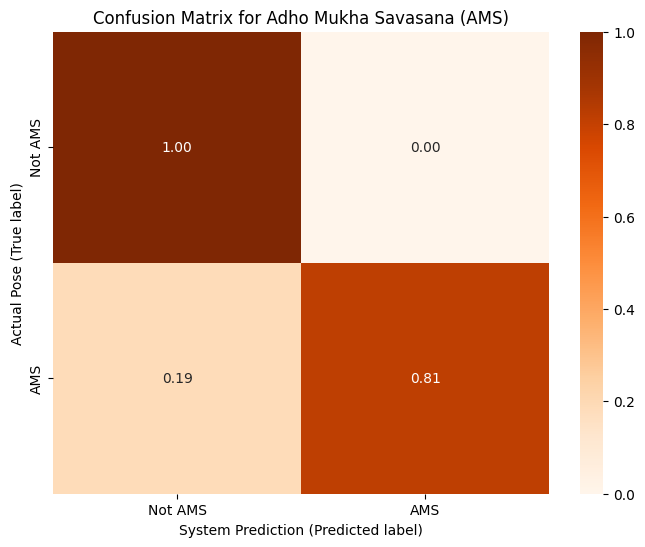

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data


# Generating the confusion matrix
cm = confusion_matrix(ytrue, ypred)

# Optionally, normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Oranges', xticklabels=['Not AMS', 'AMS'], yticklabels=['Not AMS', 'AMS'])
plt.ylabel('Actual Pose (True label)')
plt.xlabel('System Prediction (Predicted label)')
plt.title('Confusion Matrix for Adho Mukha Savasana (AMS)')
plt.show()


In [18]:
# ARDHA UTTARASANA

In [19]:
import csv


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle


# left_arm_data = []
# right_arm_data = []
# left_leg_data = []
# right_leg_data = []

# lower_body=[]
# middle_body=[]
# upper_body=[]
tp=0
tn=0
fp=0
fn=0
amscnt = 0
extraams=0
extraau=0
extrabal=0
extrabhu=0
extracat=0
extracam=0
extrasbv=0
extraut=0
ams_list=[]
au_list=[]
bal_list=[]
bhu_list=[]
cat_list=[]
cam_list=[]
sbv_list=[]
ut_list=[]
vis=[]
extra=0
ams=0
bal=0
bhu=0
sbv=0
ut=0
cat=0
cam=0
ytrue=[]
ypred=[]
au=0
correct=0
total=0
amslb=[]
amsmb=[]
amsub=[]
arm=[]
shldr=[]
hip=[]
leg=[]


total=len(image_paths)

for image_path in image_paths:
#     vis.append(image_path)
    
    
    
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
#             print(s)
            break
        else:
            s+=ip
        
    if(s=="ams"):
        amscnt+=1
        
    
#     image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
    output = cv2.imread(image_path)

    image_pose = output 
    pose = pose_image
    draw = True
    display = True
    # def detectPose(image_pose, pose, draw=False, display=False):
    

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:    


        landmarks = resultant.pose_landmarks.landmark



    ####################################################################
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]


        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
        left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]



















    #########################################################
        # CALCULATE THE ANGLE
    #     angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
    #     angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
    #     angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
    #     angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  

    
#     Adho mukha savasana

        lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
        lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

        middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

        upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
        upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)
        
        upper_body_1_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        upper_body_2_1 = calculate_angles(right_shoulder,right_elbow,right_wrist)
        
        leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
        leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

        hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
        hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)
        
        hip_1_1 = calculate_angles(left_knee,left_hip,nose)
        hip_2_2 = calculate_angles(right_knee,right_hip,nose)
        
        
        shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
        shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

        arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)



        lb = (lower_body_1 + lower_body_2)/2
        mb = (middle_body_1 + middle_body_2)/2
        ub = (upper_body_1 + upper_body_2)/2     
        ub2 = (upper_body_1_1 + upper_body_2_1)/2


        arms = (arms_1 + arms_2)/2
        shoulder = (shoulder_1 + shoulder_2)/2
        hips = (hip_1 + hip_2)/2
        legs = (leg_1 + leg_2)/2
        
        hips_tri = hip_triangle

        hips_cc = (hip_1_1 + hip_2_2)/2
    
        
        
        
#         ams

        if((arms>=140 and arms<=180) and (shoulder>=75 and shoulder<=115) and (hips>=40 and hips<=70) and (legs>=150 and legs<=180)):
            if(s=="au"):
                
                correct+=1
                au+=1
                tp+=1
                ytrue.append(1)
                ypred.append(1)
                vis.append(image_path)
                
            else:
                extraams+=1
                fp+=1
                ytrue.append(0)
                ypred.append(1)
                print(img_path)
                vis.append(image_path)
                
        else:
            if(s!="au"):
                tn+=1
                ytrue.append(0)
                ypred.append(0)
                vis.append(image_path)
            else:
                fn+=1
                ytrue.append(1)
                ypred.append(0)
                vis.append(image_path)

    

            
#             uttanasana
        
# accuracy = (correct/total)*100
print("TOTAL: ",total)
# print("ACCURACY: ",accuracy)
# print("CORRECT: ",correct)
# print("AMS: ",ams)

# print("EXTRAAMS: ",extraams)
# print("AMS COUNT: ",amscnt)

print("TRUE POSITIVE: ",tp)
print("TRUE NEGATIVE: ",tn)
print("FALSE POSITIVE: ",fp)
print("FALSE NEGATIVE: ",fn)

accuracy = (tn+tp)/(tn+fp+tp+fn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1score = 2 * ((precision*recall)/(precision+recall))



accuracy = round(accuracy,6)
precision = round(precision,6)
recall = round(recall,6)
f1score = round(f1score,6)
print("ACCURACY: ",accuracy)
print("PRECISION: ",precision)
print("RECALL: ",recall)
print("F1 SCORE: ",f1score)

TOTAL:  215
TRUE POSITIVE:  24
TRUE NEGATIVE:  188
FALSE POSITIVE:  0
FALSE NEGATIVE:  3
ACCURACY:  0.986047
PRECISION:  1.0
RECALL:  0.888889
F1 SCORE:  0.941176


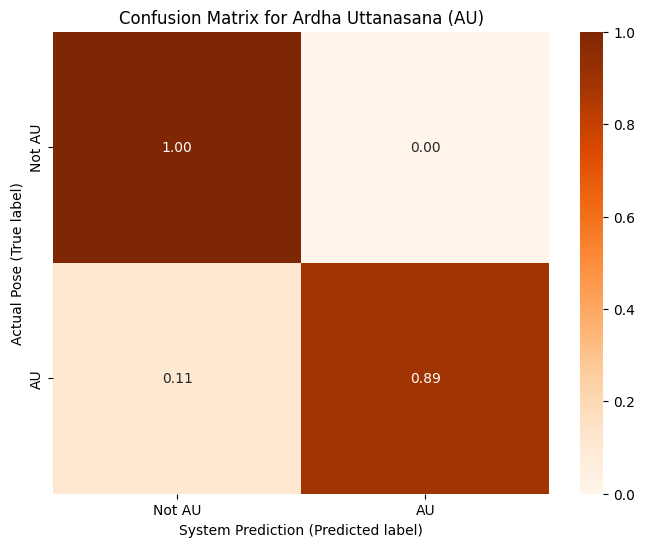

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data


# Generating the confusion matrix
cm = confusion_matrix(ytrue, ypred)

# Optionally, normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Oranges', xticklabels=['Not AU', 'AU'], yticklabels=['Not AU', 'AU'])
plt.ylabel('Actual Pose (True label)')
plt.xlabel('System Prediction (Predicted label)')
plt.title('Confusion Matrix for Ardha Uttanasana (AU)')
plt.show()


In [23]:
# BALASANA

In [24]:
import csv


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle


# left_arm_data = []
# right_arm_data = []
# left_leg_data = []
# right_leg_data = []

# lower_body=[]
# middle_body=[]
# upper_body=[]
tp=0
tn=0
fp=0
fn=0
amscnt = 0
extraams=0
extraau=0
extrabal=0
extrabhu=0
extracat=0
extracam=0
extrasbv=0
extraut=0
ams_list=[]
au_list=[]
bal_list=[]
bhu_list=[]
cat_list=[]
cam_list=[]
sbv_list=[]
ut_list=[]
vis=[]
extra=0
ams=0
bal=0
bhu=0
sbv=0
ut=0
cat=0
cam=0
ytrue=[]
ypred=[]
au=0
correct=0
total=0
amslb=[]
amsmb=[]
amsub=[]
arm=[]
shldr=[]
hip=[]
leg=[]


total=len(image_paths)

for image_path in image_paths:
#     vis.append(image_path)
    
    
    
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
#             print(s)
            break
        else:
            s+=ip
        
    if(s=="ams"):
        amscnt+=1
        
    
#     image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
    output = cv2.imread(image_path)

    image_pose = output 
    pose = pose_image
    draw = True
    display = True
    # def detectPose(image_pose, pose, draw=False, display=False):
    

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:    


        landmarks = resultant.pose_landmarks.landmark



    ####################################################################
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]


        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
        left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]



















    #########################################################
        # CALCULATE THE ANGLE
    #     angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
    #     angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
    #     angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
    #     angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  

    
#     Adho mukha savasana

        lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
        lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

        middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

        upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
        upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)
        
        upper_body_1_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        upper_body_2_1 = calculate_angles(right_shoulder,right_elbow,right_wrist)
        
        leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
        leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

        hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
        hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)
        
        hip_1_1 = calculate_angles(left_knee,left_hip,nose)
        hip_2_2 = calculate_angles(right_knee,right_hip,nose)
        
        
        shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
        shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

        arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)



        lb = (lower_body_1 + lower_body_2)/2
        mb = (middle_body_1 + middle_body_2)/2
        ub = (upper_body_1 + upper_body_2)/2     
        ub2 = (upper_body_1_1 + upper_body_2_1)/2


        arms = (arms_1 + arms_2)/2
        shoulder = (shoulder_1 + shoulder_2)/2
        hips = (hip_1 + hip_2)/2
        legs = (leg_1 + leg_2)/2
        
        hips_tri = hip_triangle

        hips_cc = (hip_1_1 + hip_2_2)/2
    
        
        
        
#         ams

        if((lb>=45 and lb<=70) and (mb>=20 and mb<=50) and (ub2>=135 and ub2<=175)):
            if(s=="bal"):
                
                correct+=1
                bal+=1
                tp+=1
                ytrue.append(1)
                ypred.append(1)
                vis.append(image_path)
                
            else:
                extraams+=1
                fp+=1
                ytrue.append(0)
                ypred.append(1)
                print(img_path)
                vis.append(image_path)
                
        else:
            if(s!="bal"):
                tn+=1
                ytrue.append(0)
                ypred.append(0)
                vis.append(image_path)
            else:
                fn+=1
                ytrue.append(1)
                ypred.append(0)
                vis.append(image_path)

    

            
#             uttanasana
        
# accuracy = (correct/total)*100
print("TOTAL: ",total)
# print("ACCURACY: ",accuracy)
# print("CORRECT: ",correct)
# print("AMS: ",ams)

# print("EXTRAAMS: ",extraams)
# print("AMS COUNT: ",amscnt)

print("TRUE POSITIVE: ",tp)
print("TRUE NEGATIVE: ",tn)
print("FALSE POSITIVE: ",fp)
print("FALSE NEGATIVE: ",fn)

accuracy = (tn+tp)/(tn+fp+tp+fn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1score = 2 * ((precision*recall)/(precision+recall))



accuracy = round(accuracy,6)
precision = round(precision,6)
recall = round(recall,6)
f1score = round(f1score,6)


print("ACCURACY: ",accuracy)
print("PRECISION: ",precision)
print("RECALL: ",recall)
print("F1 SCORE: ",f1score)

TOTAL:  215
TRUE POSITIVE:  19
TRUE NEGATIVE:  188
FALSE POSITIVE:  0
FALSE NEGATIVE:  8
ACCURACY:  0.962791
PRECISION:  1.0
RECALL:  0.703704
F1 SCORE:  0.826087


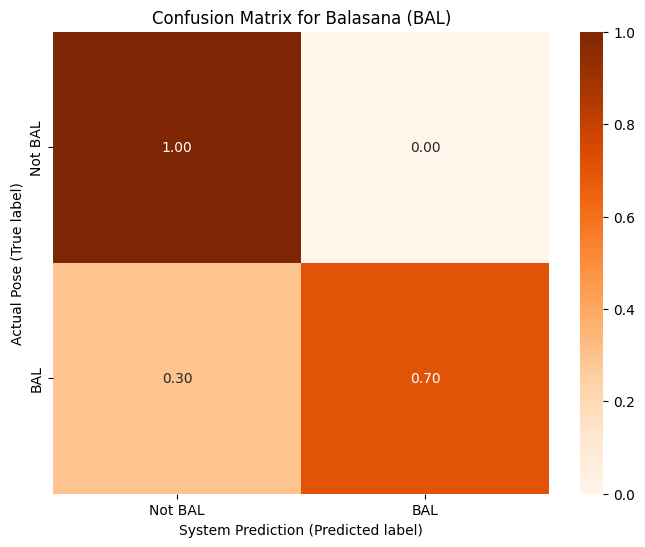

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data


# Generating the confusion matrix
cm = confusion_matrix(ytrue, ypred)

# Optionally, normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Oranges', xticklabels=['Not BAL', 'BAL'], yticklabels=['Not BAL', 'BAL'])
plt.ylabel('Actual Pose (True label)')
plt.xlabel('System Prediction (Predicted label)')
plt.title('Confusion Matrix for Balasana (BAL)')
plt.show()


In [27]:
# BHUJANGASANA

In [28]:
import csv


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle


# left_arm_data = []
# right_arm_data = []
# left_leg_data = []
# right_leg_data = []

# lower_body=[]
# middle_body=[]
# upper_body=[]
tp=0
tn=0
fp=0
fn=0
amscnt = 0
extraams=0
extraau=0
extrabal=0
extrabhu=0
extracat=0
extracam=0
extrasbv=0
extraut=0
ams_list=[]
au_list=[]
bal_list=[]
bhu_list=[]
cat_list=[]
cam_list=[]
sbv_list=[]
ut_list=[]
vis=[]
extra=0
ams=0
bal=0
bhu=0
sbv=0
ut=0
cat=0
cam=0
ytrue=[]
ypred=[]
au=0
correct=0
total=0
amslb=[]
amsmb=[]
amsub=[]
arm=[]
shldr=[]
hip=[]
leg=[]


total=len(image_paths)

for image_path in image_paths:
#     vis.append(image_path)
    
    
    
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
#             print(s)
            break
        else:
            s+=ip
        
    if(s=="ams"):
        amscnt+=1
        
    
#     image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
    output = cv2.imread(image_path)

    image_pose = output 
    pose = pose_image
    draw = True
    display = True
    # def detectPose(image_pose, pose, draw=False, display=False):
    

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:    


        landmarks = resultant.pose_landmarks.landmark



    ####################################################################
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]


        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
        left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]



















    #########################################################
        # CALCULATE THE ANGLE
    #     angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
    #     angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
    #     angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
    #     angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  

    
#     Adho mukha savasana

        lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
        lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

        middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

        upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
        upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)
        
        upper_body_1_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        upper_body_2_1 = calculate_angles(right_shoulder,right_elbow,right_wrist)
        
        leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
        leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

        hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
        hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)
        
        hip_1_1 = calculate_angles(left_knee,left_hip,nose)
        hip_2_2 = calculate_angles(right_knee,right_hip,nose)
        
        
        shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
        shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

        arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)



        lb = (lower_body_1 + lower_body_2)/2
        mb = (middle_body_1 + middle_body_2)/2
        ub = (upper_body_1 + upper_body_2)/2     
        ub2 = (upper_body_1_1 + upper_body_2_1)/2


        arms = (arms_1 + arms_2)/2
        shoulder = (shoulder_1 + shoulder_2)/2
        hips = (hip_1 + hip_2)/2
        legs = (leg_1 + leg_2)/2
        
        hips_tri = hip_triangle

        hips_cc = (hip_1_1 + hip_2_2)/2
    
        
        
        
#         ams

        if((lb>=140 and lb<=175) and (mb>=105 and mb<=145) and (ub2>=140 and ub2<=175)):
            if(s=="bhu"):
                
                correct+=1
                ams+=1
                tp+=1
                ytrue.append(1)
                ypred.append(1)
                vis.append(image_path)
                
            else:
                extraams+=1
                fp+=1
                ytrue.append(0)
                ypred.append(1)
                print(img_path)
                vis.append(image_path)
                
        else:
            if(s!="bhu"):
                tn+=1
                ytrue.append(0)
                ypred.append(0)
                vis.append(image_path)
            else:
                fn+=1
                ytrue.append(1)
                ypred.append(0)
                vis.append(image_path)

    

            
#             uttanasana
        
# accuracy = (correct/total)*100
print("TOTAL: ",total)
# print("ACCURACY: ",accuracy)
# print("CORRECT: ",correct)
# print("AMS: ",ams)

# print("EXTRAAMS: ",extraams)
# print("AMS COUNT: ",amscnt)

print("TRUE POSITIVE: ",tp)
print("TRUE NEGATIVE: ",tn)
print("FALSE POSITIVE: ",fp)
print("FALSE NEGATIVE: ",fn)

accuracy = (tn+tp)/(tn+fp+tp+fn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1score = 2 * ((precision*recall)/(precision+recall))



accuracy = round(accuracy,6)
precision = round(precision,6)
recall = round(recall,6)
f1score = round(f1score,6)


print("ACCURACY: ",accuracy)
print("PRECISION: ",precision)
print("RECALL: ",recall)
print("F1 SCORE: ",f1score)

ams_13.png
ut_19.png
ut_6.png
TOTAL:  215
TRUE POSITIVE:  21
TRUE NEGATIVE:  185
FALSE POSITIVE:  3
FALSE NEGATIVE:  6
ACCURACY:  0.95814
PRECISION:  0.875
RECALL:  0.777778
F1 SCORE:  0.823529


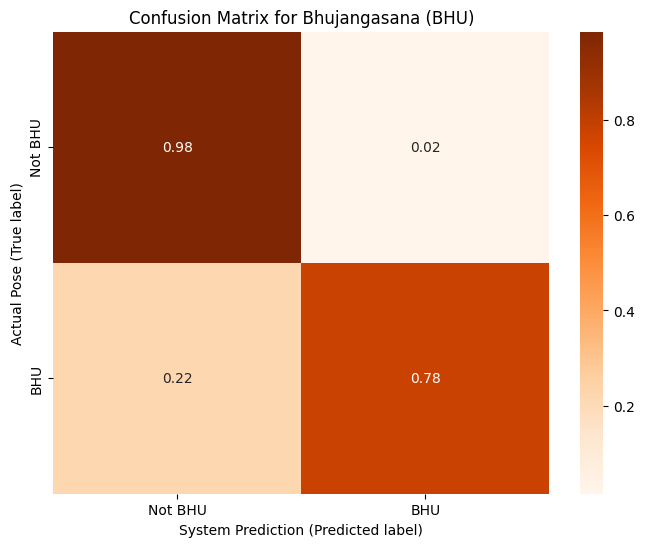

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data


# Generating the confusion matrix
cm = confusion_matrix(ytrue, ypred)

# Optionally, normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Oranges', xticklabels=['Not BHU', 'BHU'], yticklabels=['Not BHU', 'BHU'])
plt.ylabel('Actual Pose (True label)')
plt.xlabel('System Prediction (Predicted label)')
plt.title('Confusion Matrix for Bhujangasana (BHU)')
plt.show()


In [31]:
# CAMEL

In [32]:
import csv


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle


# left_arm_data = []
# right_arm_data = []
# left_leg_data = []
# right_leg_data = []

# lower_body=[]
# middle_body=[]
# upper_body=[]
tp=0
tn=0
fp=0
fn=0
amscnt = 0
extraams=0
extraau=0
extrabal=0
extrabhu=0
extracat=0
extracam=0
extrasbv=0
extraut=0
ams_list=[]
au_list=[]
bal_list=[]
bhu_list=[]
cat_list=[]
cam_list=[]
sbv_list=[]
ut_list=[]
vis=[]
extra=0
ams=0
bal=0
bhu=0
sbv=0
ut=0
cat=0
cam=0
ytrue=[]
ypred=[]
au=0
correct=0
total=0
amslb=[]
amsmb=[]
amsub=[]
arm=[]
shldr=[]
hip=[]
leg=[]


total=len(image_paths)

for image_path in image_paths:
#     vis.append(image_path)
    
    
    
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
#             print(s)
            break
        else:
            s+=ip
        
    if(s=="ams"):
        amscnt+=1
        
    
#     image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
    output = cv2.imread(image_path)

    image_pose = output 
    pose = pose_image
    draw = True
    display = True
    # def detectPose(image_pose, pose, draw=False, display=False):
    

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:    


        landmarks = resultant.pose_landmarks.landmark



    ####################################################################
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]


        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
        left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]



















    #########################################################
        # CALCULATE THE ANGLE
    #     angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
    #     angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
    #     angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
    #     angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  

    
#     Adho mukha savasana

        lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
        lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

        middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

        upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
        upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)
        
        upper_body_1_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        upper_body_2_1 = calculate_angles(right_shoulder,right_elbow,right_wrist)
        
        leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
        leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

        hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
        hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)
        
        hip_1_1 = calculate_angles(left_knee,left_hip,nose)
        hip_2_2 = calculate_angles(right_knee,right_hip,nose)
        
        
        shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
        shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

        arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)



        lb = (lower_body_1 + lower_body_2)/2
        mb = (middle_body_1 + middle_body_2)/2
        ub = (upper_body_1 + upper_body_2)/2     
        ub2 = (upper_body_1_1 + upper_body_2_1)/2


        arms = (arms_1 + arms_2)/2
        shoulder = (shoulder_1 + shoulder_2)/2
        hips = (hip_1 + hip_2)/2
        legs = (leg_1 + leg_2)/2
        
        hips_tri = hip_triangle

        hips_cc = (hip_1_1 + hip_2_2)/2
    
        
        
        
#         ams

        if((arms>=165 and arms<=180) and (hips_cc<=90) and (legs>=70 and legs<=110)):
            if(s=="cam"):
                
                correct+=1
                ams+=1
                tp+=1
                ytrue.append(1)
                ypred.append(1)
                vis.append(image_path)
                
            else:
                extraams+=1
                fp+=1
                ytrue.append(0)
                ypred.append(1)
                print(img_path)
                vis.append(image_path)
                
        else:
            if(s!="cam"):
                tn+=1
                ytrue.append(0)
                ypred.append(0)
                vis.append(image_path)
            else:
                fn+=1
                ytrue.append(1)
                ypred.append(0)
                vis.append(image_path)

    

            
#             uttanasana
        
# accuracy = (correct/total)*100
print("TOTAL: ",total)
# print("ACCURACY: ",accuracy)
# print("CORRECT: ",correct)
# print("AMS: ",ams)

# print("EXTRAAMS: ",extraams)
# print("AMS COUNT: ",amscnt)

print("TRUE POSITIVE: ",tp)
print("TRUE NEGATIVE: ",tn)
print("FALSE POSITIVE: ",fp)
print("FALSE NEGATIVE: ",fn)

accuracy = (tn+tp)/(tn+fp+tp+fn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1score = 2 * ((precision*recall)/(precision+recall))



accuracy = round(accuracy,6)
precision = round(precision,6)
recall = round(recall,6)
f1score = round(f1score,6)


print("ACCURACY: ",accuracy)
print("PRECISION: ",precision)
print("RECALL: ",recall)
print("F1 SCORE: ",f1score)

TOTAL:  215
TRUE POSITIVE:  25
TRUE NEGATIVE:  188
FALSE POSITIVE:  0
FALSE NEGATIVE:  2
ACCURACY:  0.990698
PRECISION:  1.0
RECALL:  0.925926
F1 SCORE:  0.961538


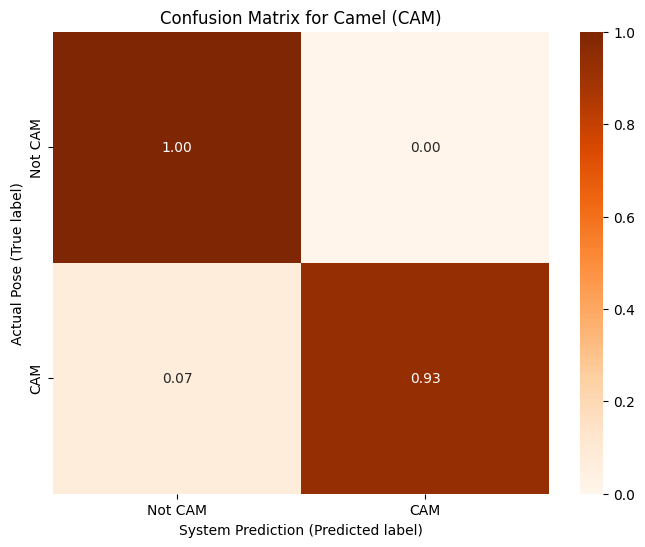

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data


# Generating the confusion matrix
cm = confusion_matrix(ytrue, ypred)

# Optionally, normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Oranges', xticklabels=['Not CAM', 'CAM'], yticklabels=['Not CAM', 'CAM'])
plt.ylabel('Actual Pose (True label)')
plt.xlabel('System Prediction (Predicted label)')
plt.title('Confusion Matrix for Camel (CAM)')
plt.show()


In [35]:
# CAT

In [36]:
import csv


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle


# left_arm_data = []
# right_arm_data = []
# left_leg_data = []
# right_leg_data = []

# lower_body=[]
# middle_body=[]
# upper_body=[]
tp=0
tn=0
fp=0
fn=0
amscnt = 0
extraams=0
extraau=0
extrabal=0
extrabhu=0
extracat=0
extracam=0
extrasbv=0
extraut=0
ams_list=[]
au_list=[]
bal_list=[]
bhu_list=[]
cat_list=[]
cam_list=[]
sbv_list=[]
ut_list=[]
vis=[]
extra=0
ams=0
bal=0
bhu=0
sbv=0
ut=0
cat=0
cam=0
ytrue=[]
ypred=[]
au=0
correct=0
total=0
amslb=[]
amsmb=[]
amsub=[]
arm=[]
shldr=[]
hip=[]
leg=[]


total=len(image_paths)

for image_path in image_paths:
#     vis.append(image_path)
    
    
    
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
#             print(s)
            break
        else:
            s+=ip
        
    if(s=="ams"):
        amscnt+=1
        
    
#     image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
    output = cv2.imread(image_path)

    image_pose = output 
    pose = pose_image
    draw = True
    display = True
    # def detectPose(image_pose, pose, draw=False, display=False):
    

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:    


        landmarks = resultant.pose_landmarks.landmark



    ####################################################################
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]


        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
        left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]



















    #########################################################
        # CALCULATE THE ANGLE
    #     angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
    #     angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
    #     angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
    #     angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  

    
#     Adho mukha savasana

        lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
        lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

        middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

        upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
        upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)
        
        upper_body_1_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        upper_body_2_1 = calculate_angles(right_shoulder,right_elbow,right_wrist)
        
        leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
        leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

        hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
        hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)
        
        hip_1_1 = calculate_angles(left_knee,left_hip,nose)
        hip_2_2 = calculate_angles(right_knee,right_hip,nose)
        
        
        shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
        shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

        arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)



        lb = (lower_body_1 + lower_body_2)/2
        mb = (middle_body_1 + middle_body_2)/2
        ub = (upper_body_1 + upper_body_2)/2     
        ub2 = (upper_body_1_1 + upper_body_2_1)/2


        arms = (arms_1 + arms_2)/2
        shoulder = (shoulder_1 + shoulder_2)/2
        hips = (hip_1 + hip_2)/2
        legs = (leg_1 + leg_2)/2
        
        hips_tri = hip_triangle

        hips_cc = (hip_1_1 + hip_2_2)/2
    
        
        
        
#         ams

        if((arms>=165 and arms<=180) and (hips_cc>=100) and (legs>=70 and legs<=110)):
            if(s=="cat"):
                
                correct+=1
                ams+=1
                tp+=1
                ytrue.append(1)
                ypred.append(1)
                vis.append(image_path)
                
            else:
                extraams+=1
                fp+=1
                ytrue.append(0)
                ypred.append(1)
                print(img_path)
                vis.append(image_path)
                
        else:
            if(s!="cat"):
                tn+=1
                ytrue.append(0)
                ypred.append(0)
                vis.append(image_path)
            else:
                fn+=1
                ytrue.append(1)
                ypred.append(0)
                vis.append(image_path)

    

            
#             uttanasana
        
# accuracy = (correct/total)*100
print("TOTAL: ",total)
# print("ACCURACY: ",accuracy)
# print("CORRECT: ",correct)
# print("AMS: ",ams)

# print("EXTRAAMS: ",extraams)
# print("AMS COUNT: ",amscnt)

print("TRUE POSITIVE: ",tp)
print("TRUE NEGATIVE: ",tn)
print("FALSE POSITIVE: ",fp)
print("FALSE NEGATIVE: ",fn)

accuracy = (tn+tp)/(tn+fp+tp+fn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1score = 2 * ((precision*recall)/(precision+recall))



accuracy = round(accuracy,6)
precision = round(precision,6)
recall = round(recall,6)
f1score = round(f1score,6)


print("ACCURACY: ",accuracy)
print("PRECISION: ",precision)
print("RECALL: ",recall)
print("F1 SCORE: ",f1score)

bhu_203.jpeg
sbv_ (22).png
sbv_ (9)9.png
sbv_20.png
sbv_406.jpg
TOTAL:  215
TRUE POSITIVE:  27
TRUE NEGATIVE:  183
FALSE POSITIVE:  5
FALSE NEGATIVE:  0
ACCURACY:  0.976744
PRECISION:  0.84375
RECALL:  1.0
F1 SCORE:  0.915254


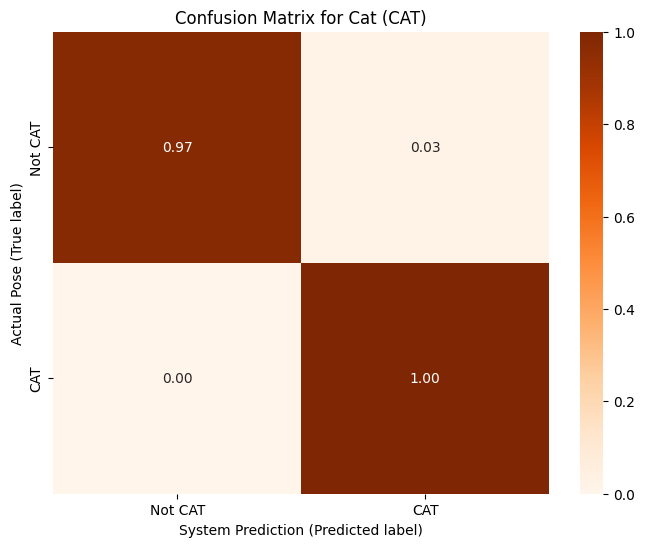

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data


# Generating the confusion matrix
cm = confusion_matrix(ytrue, ypred)

# Optionally, normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Oranges', xticklabels=['Not CAT', 'CAT'], yticklabels=['Not CAT', 'CAT'])
plt.ylabel('Actual Pose (True label)')
plt.xlabel('System Prediction (Predicted label)')
plt.title('Confusion Matrix for Cat (CAT)')
plt.show()


In [39]:
# SETU BANDHA

In [40]:
import csv


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle


# left_arm_data = []
# right_arm_data = []
# left_leg_data = []
# right_leg_data = []

# lower_body=[]
# middle_body=[]
# upper_body=[]
tp=0
tn=0
fp=0
fn=0
amscnt = 0
extraams=0
extraau=0
extrabal=0
extrabhu=0
extracat=0
extracam=0
extrasbv=0
extraut=0
ams_list=[]
au_list=[]
bal_list=[]
bhu_list=[]
cat_list=[]
cam_list=[]
sbv_list=[]
ut_list=[]
vis=[]
extra=0
ams=0
bal=0
bhu=0
sbv=0
ut=0
cat=0
cam=0
ytrue=[]
ypred=[]
au=0
correct=0
total=0
amslb=[]
amsmb=[]
amsub=[]
arm=[]
shldr=[]
hip=[]
leg=[]


total=len(image_paths)

for image_path in image_paths:
#     vis.append(image_path)
    
    
    
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
#             print(s)
            break
        else:
            s+=ip
        
    if(s=="ams"):
        amscnt+=1
        
    
#     image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
    output = cv2.imread(image_path)

    image_pose = output 
    pose = pose_image
    draw = True
    display = True
    # def detectPose(image_pose, pose, draw=False, display=False):
    

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:    


        landmarks = resultant.pose_landmarks.landmark



    ####################################################################
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]


        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
        left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]



















    #########################################################
        # CALCULATE THE ANGLE
    #     angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
    #     angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
    #     angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
    #     angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  

    
#     Adho mukha savasana

        lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
        lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

        middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

        upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
        upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)
        
        upper_body_1_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        upper_body_2_1 = calculate_angles(right_shoulder,right_elbow,right_wrist)
        
        leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
        leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

        hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
        hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)
        
        hip_1_1 = calculate_angles(left_knee,left_hip,nose)
        hip_2_2 = calculate_angles(right_knee,right_hip,nose)
        
        
        shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
        shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

        arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)



        lb = (lower_body_1 + lower_body_2)/2
        mb = (middle_body_1 + middle_body_2)/2
        ub = (upper_body_1 + upper_body_2)/2     
        ub2 = (upper_body_1_1 + upper_body_2_1)/2


        arms = (arms_1 + arms_2)/2
        shoulder = (shoulder_1 + shoulder_2)/2
        hips = (hip_1 + hip_2)/2
        legs = (leg_1 + leg_2)/2
        
        hips_tri = hip_triangle

        hips_cc = (hip_1_1 + hip_2_2)/2
    
        
        
        
#         ams

        if((arms>=140 and arms<=180) and (shoulder>=50 and shoulder<=80) and (hips>=135 and hips<=170) and (legs>=50 and legs<=90)):
            if(s=="sbv"):
                
                correct+=1
                ams+=1
                tp+=1
                ytrue.append(1)
                ypred.append(1)
                vis.append(image_path)
                
            else:
                extraams+=1
                fp+=1
                ytrue.append(0)
                ypred.append(1)
                print(img_path)
                vis.append(image_path)
                
        else:
            if(s!="sbv"):
                tn+=1
                ytrue.append(0)
                ypred.append(0)
                vis.append(image_path)
            else:
                fn+=1
                ytrue.append(1)
                ypred.append(0)
                vis.append(image_path)

    

            
#             uttanasana
        
# accuracy = (correct/total)*100
print("TOTAL: ",total)
# print("ACCURACY: ",accuracy)
# print("CORRECT: ",correct)
# print("AMS: ",ams)

# print("EXTRAAMS: ",extraams)
# print("AMS COUNT: ",amscnt)

print("TRUE POSITIVE: ",tp)
print("TRUE NEGATIVE: ",tn)
print("FALSE POSITIVE: ",fp)
print("FALSE NEGATIVE: ",fn)

accuracy = (tn+tp)/(tn+fp+tp+fn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1score = 2 * ((precision*recall)/(precision+recall))



accuracy = round(accuracy,6)
precision = round(precision,6)
recall = round(recall,6)
f1score = round(f1score,6)


print("ACCURACY: ",accuracy)
print("PRECISION: ",precision)
print("RECALL: ",recall)
print("F1 SCORE: ",f1score)

cat_5.png
TOTAL:  215
TRUE POSITIVE:  21
TRUE NEGATIVE:  188
FALSE POSITIVE:  1
FALSE NEGATIVE:  5
ACCURACY:  0.972093
PRECISION:  0.954545
RECALL:  0.807692
F1 SCORE:  0.875


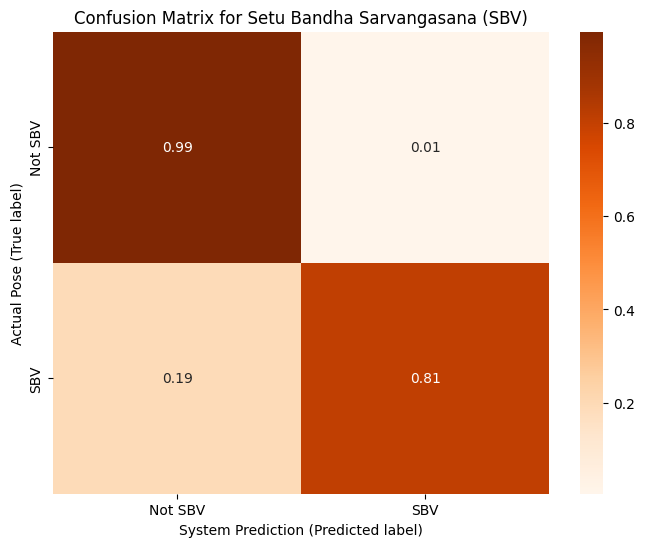

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data


# Generating the confusion matrix
cm = confusion_matrix(ytrue, ypred)

# Optionally, normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Oranges', xticklabels=['Not SBV', 'SBV'], yticklabels=['Not SBV', 'SBV'])
plt.ylabel('Actual Pose (True label)')
plt.xlabel('System Prediction (Predicted label)')
plt.title('Confusion Matrix for Setu Bandha Sarvangasana (SBV)')
plt.show()


In [43]:
# TRIKONASANA

In [44]:
import csv


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle


# left_arm_data = []
# right_arm_data = []
# left_leg_data = []
# right_leg_data = []

# lower_body=[]
# middle_body=[]
# upper_body=[]
tp=0
tn=0
fp=0
fn=0
amscnt = 0
extraams=0
extraau=0
extrabal=0
extrabhu=0
extracat=0
extracam=0
extrasbv=0
extraut=0
ams_list=[]
au_list=[]
bal_list=[]
bhu_list=[]
cat_list=[]
cam_list=[]
sbv_list=[]
ut_list=[]
vis=[]
extra=0
ams=0
bal=0
bhu=0
sbv=0
ut=0
cat=0
cam=0
ytrue=[]
ypred=[]
au=0
correct=0
total=0
amslb=[]
amsmb=[]
amsub=[]
arm=[]
shldr=[]
hip=[]
leg=[]


total=len(image_paths)

for image_path in image_paths:
#     vis.append(image_path)
    
    
    
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
#             print(s)
            break
        else:
            s+=ip
        
    if(s=="ams"):
        amscnt+=1
        
    
#     image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
    output = cv2.imread(image_path)

    image_pose = output 
    pose = pose_image
    draw = True
    display = True
    # def detectPose(image_pose, pose, draw=False, display=False):
    

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:    


        landmarks = resultant.pose_landmarks.landmark



    ####################################################################
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]


        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
        left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]



















    #########################################################
        # CALCULATE THE ANGLE
    #     angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
    #     angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
    #     angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
    #     angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  

    
#     Adho mukha savasana

        lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
        lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

        middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

        upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
        upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)
        
        upper_body_1_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        upper_body_2_1 = calculate_angles(right_shoulder,right_elbow,right_wrist)
        
        leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
        leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

        hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
        hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)
        
        hip_1_1 = calculate_angles(left_knee,left_hip,nose)
        hip_2_2 = calculate_angles(right_knee,right_hip,nose)
        
        
        shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
        shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

        arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)



        lb = (lower_body_1 + lower_body_2)/2
        mb = (middle_body_1 + middle_body_2)/2
        ub = (upper_body_1 + upper_body_2)/2     
        ub2 = (upper_body_1_1 + upper_body_2_1)/2


        arms = (arms_1 + arms_2)/2
        shoulder = (shoulder_1 + shoulder_2)/2
        hips = (hip_1 + hip_2)/2
        legs = (leg_1 + leg_2)/2
        
        hips_tri = hip_triangle

        hips_cc = (hip_1_1 + hip_2_2)/2
    
        
        
        
#         ams

        if((arms>=150 and arms<=180) and (shoulder>=80 and shoulder<=110) and (hips_tri>=75 and hips_tri<=105) and (legs>=155 and legs<=180)):
            if(s=="ut"):
                
                correct+=1
                ams+=1
                tp+=1
                ytrue.append(1)
                ypred.append(1)
                vis.append(image_path)
                
            else:
                extraams+=1
                fp+=1
                ytrue.append(0)
                ypred.append(1)
                print(img_path)
                vis.append(image_path)
                
        else:
            if(s!="ut"):
                tn+=1
                ytrue.append(0)
                ypred.append(0)
                vis.append(image_path)
            else:
                fn+=1
                ytrue.append(1)
                ypred.append(0)
                vis.append(image_path)

    

            
#             uttanasana
        
# accuracy = (correct/total)*100
print("TOTAL: ",total)
# print("ACCURACY: ",accuracy)
# print("CORRECT: ",correct)
# print("AMS: ",ams)

# print("EXTRAAMS: ",extraams)
# print("AMS COUNT: ",amscnt)

print("TRUE POSITIVE: ",tp)
print("TRUE NEGATIVE: ",tn)
print("FALSE POSITIVE: ",fp)
print("FALSE NEGATIVE: ",fn)

accuracy = (tn+tp)/(tn+fp+tp+fn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
f1score = 2 * ((precision*recall)/(precision+recall))



accuracy = round(accuracy,6)
precision = round(precision,6)
recall = round(recall,6)
f1score = round(f1score,6)


print("ACCURACY: ",accuracy)
print("PRECISION: ",precision)
print("RECALL: ",recall)
print("F1 SCORE: ",f1score)

TOTAL:  215
TRUE POSITIVE:  25
TRUE NEGATIVE:  188
FALSE POSITIVE:  0
FALSE NEGATIVE:  2
ACCURACY:  0.990698
PRECISION:  1.0
RECALL:  0.925926
F1 SCORE:  0.961538


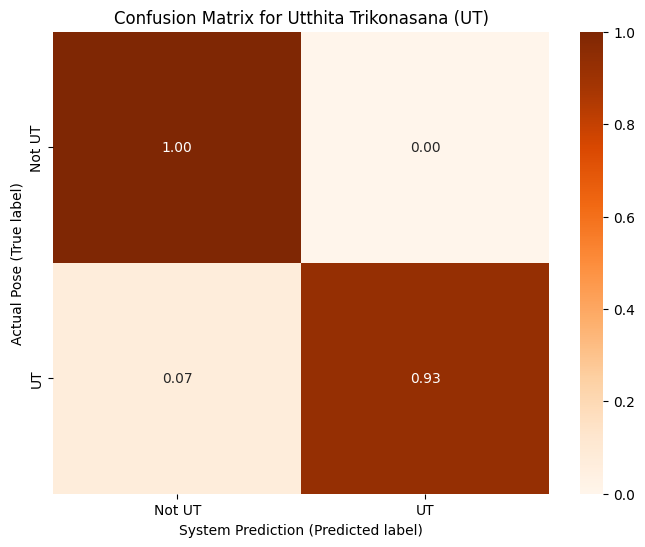

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data


# Generating the confusion matrix
cm = confusion_matrix(ytrue, ypred)

# Optionally, normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Oranges', xticklabels=['Not UT', 'UT'], yticklabels=['Not UT', 'UT'])
plt.ylabel('Actual Pose (True label)')
plt.xlabel('System Prediction (Predicted label)')
plt.title('Confusion Matrix for Utthita Trikonasana (UT)')
plt.show()


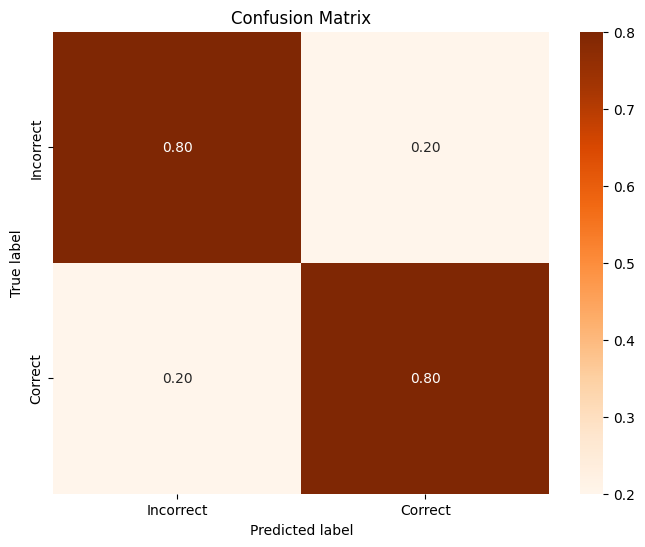

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data
ytrue = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # True labels
ypred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]  # Predictions made by your model

# Generating the confusion matrix
cm = confusion_matrix(ytrue, ypred)

# Optionally, normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Oranges', xticklabels=['Incorrect', 'Correct'], yticklabels=['Incorrect', 'Correct'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [54]:
pip install -U scikit-learn scipy matplotlib


   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 653.6 kB/s eta 0:00:15
    --------------------------------------- 0.1/9.3 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.3 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/9.3 MB 3.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.3 MB 4.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.3 MB 5.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.3 MB 6.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.3 MB 6.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.3 MB 6.8 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/9.3 MB 6.6 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.3 MB 7.3 MB/s eta 0:00:01
   ------------------ --------------------- 4.3/9.3 MB 7.6 MB/s eta 0:00:01
   --------------

In [12]:
# BAR GRAPH

In [13]:
lbnames=[]
for i in range(1,19):
    s="lb_"+str(i)
    lbnames.append(s)

In [26]:
mbnames=[]
lbnames=[]
ubnames=[]
xaxis=[]
for i in range(1,19):
    s1="lb_"+str(i)
    s2="mb_"+str(i)
    s3="ub_"+str(i)
    xaxis.append(i)
    lbnames.append(s1)
    mbnames.append(s2)
    ubnames.append(s3)

In [27]:
xaxis

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

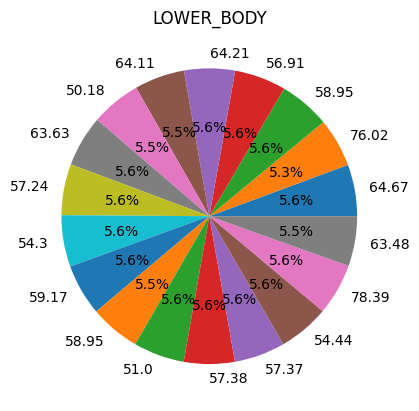

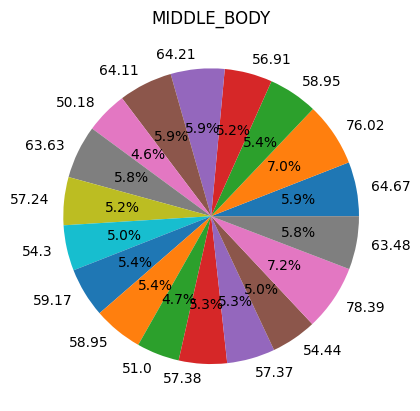

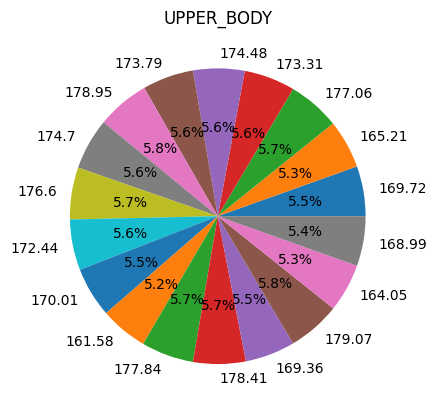

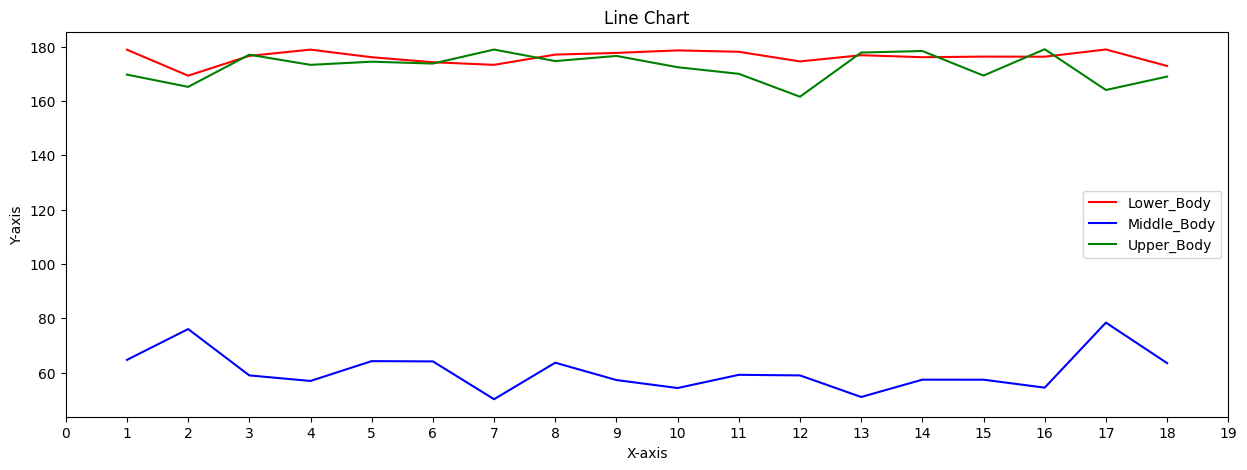

In [44]:


import pandas as pd
import matplotlib.pyplot as plt

# df = pd.DataFrame({'category': ["AMS","AU","BAL","BHU","SBV","UT","CAT","CAM"], 'value': [ams,au,bal,bhu,sbv,ut,cat,cam]})
# plt.bar(df['category'], df['value'])
# plt.xlabel('Yoga')
# plt.ylabel('Correct postures Detected')
# plt.title('Bar Chart')
# plt.show()

# df = pd.DataFrame({'category': ["AMS","AU","BAL","BHU","SBV","UT","CAT","CAM"], 'value': [ams,au,bal,bhu,sbv,ut,cat,cam]})
# plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
# plt.title('Pie Chart')
# plt.show()





# df = pd.DataFrame({'category': lbnames, 'value': amslb})
# plt.figure(figsize=(15, 5))

# plt.bar(df['category'], df['value'])
# plt.xlabel('Yoga')
# plt.ylabel('Correct postures Detected')
# plt.title('AMS_LB')
# plt.show()


# df = pd.DataFrame({'x': amslb})
# plt.hist(df['x'])
# plt.xlabel('x')
# plt.ylabel('Frequency')
# plt.title('Histogram_AMS_LB')
# plt.show()


df = pd.DataFrame({'category': amsmb, 'value': amslb})
plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
plt.title('LOWER_BODY')
plt.show()




df = pd.DataFrame({'category': amsmb, 'value': amsmb})
plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
plt.title('MIDDLE_BODY')
plt.show()




df = pd.DataFrame({'category': amsub, 'value': amsub})
plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
plt.title('UPPER_BODY')
plt.show()




plt.figure(figsize=(15, 5))
plt.plot(xaxis, amslb,color='red',label='Lower_Body')
plt.plot(xaxis, amsmb,color='blue',label='Middle_Body')
plt.plot(xaxis, amsub,color='green',label='Upper_Body')

# Set the title and labels
plt.title("Line Chart")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# Show the plot
plt.legend()
plt.xticks(np.arange(0, 20, step=1))

plt.show()





# df = pd.DataFrame({'category': mbnames, 'value': amsmb})
# plt.figure(figsize=(15, 5))

# plt.bar(df['category'], df['value'])
# plt.xlabel('Yoga')
# plt.ylabel('Correct postures Detected')
# plt.title('AMS_MB')
# plt.show()


# df = pd.DataFrame({'x': amsmb})
# plt.hist(df['x'])
# plt.xlabel('x')
# plt.ylabel('Frequency')
# plt.title('Histogram_AMS_MB')
# plt.show()

# plt.figure(figsize=(15, 5))
# plt.plot(mbnames, amsmb)
# # Set the title and labels
# plt.title("Line Chart")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# # Show the plot
# plt.show()




# df = pd.DataFrame({'category': ubnames, 'value': amsub})
# plt.figure(figsize=(15, 5))

# plt.bar(df['category'], df['value'])
# plt.xlabel('Yoga')
# plt.ylabel('Correct postures Detected')
# plt.title('AMS_UB')
# plt.show()


# df = pd.DataFrame({'x': amsub})
# plt.hist(df['x'])
# plt.xlabel('x')
# plt.ylabel('Frequency')
# plt.title('Histogram_AMS_UB')
# plt.show()


# plt.figure(figsize=(15, 5))
# plt.plot(ubnames, amsub)
# # Set the title and labels
# plt.title("Line Chart")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# # Show the plot
# plt.show()



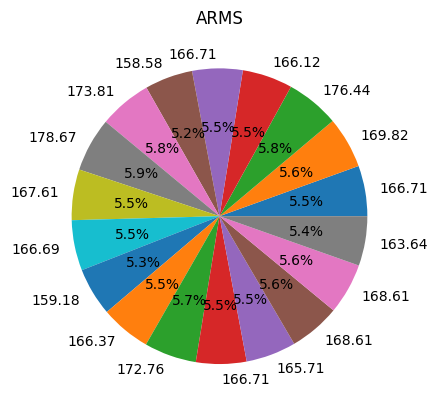

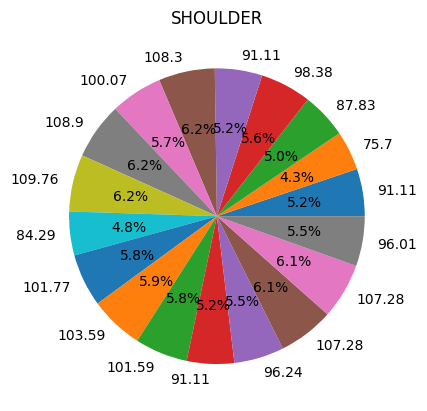

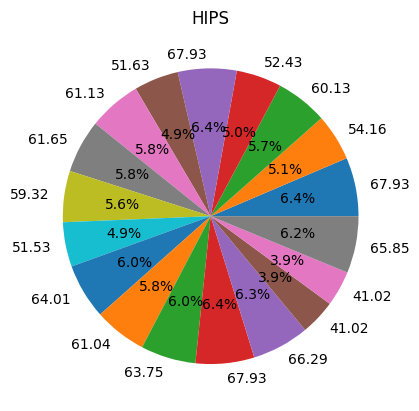

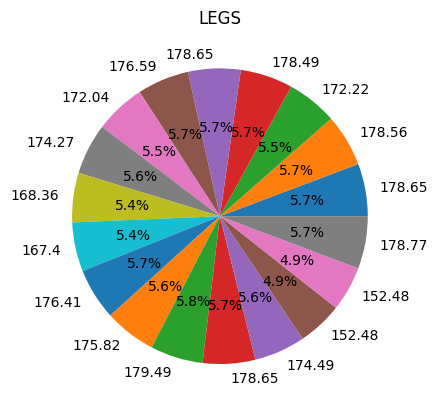

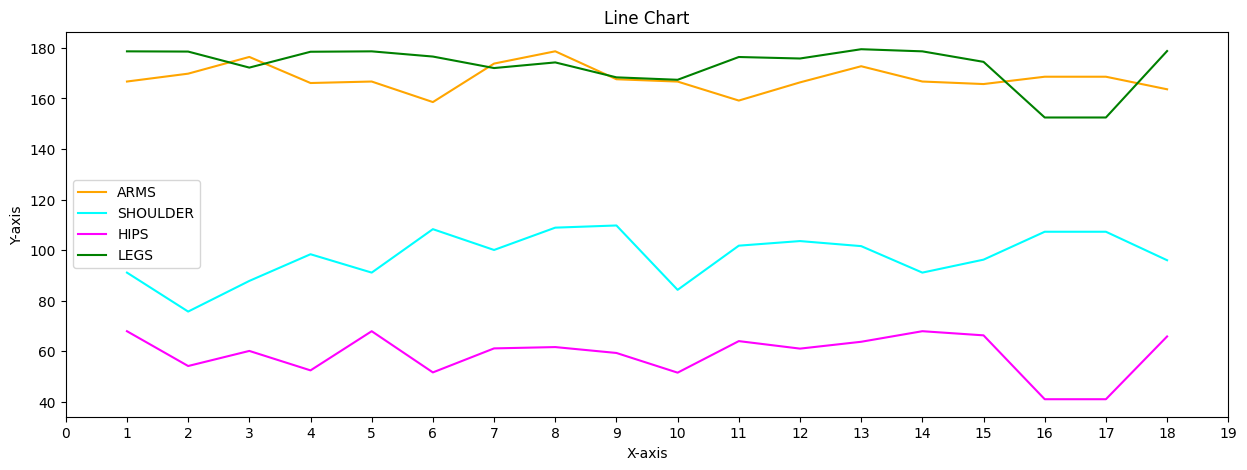

In [50]:


import pandas as pd
import matplotlib.pyplot as plt



df = pd.DataFrame({'category': arm, 'value': arm})
plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
plt.title('ARMS')
plt.show()




df = pd.DataFrame({'category': shldr, 'value': shldr})
plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
plt.title('SHOULDER')
plt.show()




df = pd.DataFrame({'category': hip, 'value': hip})
plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
plt.title('HIPS')
plt.show()




df = pd.DataFrame({'category': leg, 'value': leg})
plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
plt.title('LEGS')
plt.show()




plt.figure(figsize=(15, 5))
plt.plot(xaxis, arm,color='orange',label='ARMS')
plt.plot(xaxis, shldr,color='cyan',label='SHOULDER')
plt.plot(xaxis, hip,color='magenta',label='HIPS')
plt.plot(xaxis, leg,color='green',label='LEGS')

# Set the title and labels
plt.title("Line Chart")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# Show the plot
plt.legend()
plt.xticks(np.arange(0, 20, step=1))

plt.show()





In [25]:
pip install matplotlib seaborn plotly


Note: you may need to restart the kernel to use updated packages.


In [26]:
for image_path in image_paths:
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
            print(s)
            break
        else:
            s+=ip
        
        
#     print(img_path)

ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
